In [1]:
%run setup.ipynb

In [2]:
Y_train = pd.read_csv(DATA_PATH+'/Y_train.csv')
Y_test = pd.read_csv(DATA_PATH+'/Y_test.csv')
Y_test=Y_test['reproduction_rate']
Y_train=Y_train['reproduction_rate']

## Random Forest with feature selection and with hyperparameter tuned

In [3]:
X_train_rf = pd.read_csv(DATA_PATH+'/X_train_rf.csv')
X_test_rf = pd.read_csv(DATA_PATH+'/X_test_rf.csv')
X_train_rf=X_train_rf.drop('Unnamed: 0',axis=1)
X_test_rf=X_test_rf.drop('Unnamed: 0',axis=1)

In [4]:
rf=RandomForestRegressor(random_state=42, max_features='sqrt', n_estimators= 1200, max_depth=80,
                         bootstrap= True, min_samples_split= 5,min_samples_leaf= 2)
rf.fit(X_train_rf,Y_train)
Y_pred_rf=rf.predict(X_test_rf) 
pd.DataFrame(Y_pred_rf).to_csv(RESULTS_PATH+'/Y_pred_rf_4.csv')

In [5]:
MSE_rf=mean_squared_error(Y_test, Y_pred_rf)
print(MSE_rf)

0.006093022461409249


In [6]:
R2_rf=r2_score(Y_test, Y_pred_rf)
print(R2_rf)

0.9255298671166363


In [7]:
RMSE_rf = np.sqrt(mean_squared_error(Y_test, Y_pred_rf))
print(RMSE_rf)

0.07805781486442757


In [8]:
MAE_rf=mean_absolute_error(Y_test, Y_pred_rf)
print(MAE_rf)

0.03724944279779955


In [9]:
RAE_rf=RAE(Y_test, Y_pred_rf)
print(RAE_rf)

0.07502651613081797


In [10]:
RRSE_rf=RRSE(Y_test, Y_pred_rf)
print(RRSE_rf)

0.27289216347003786


## XGboost with feature selection and with hyperparameter tuned

In [11]:
X_train_xgboost = pd.read_csv(DATA_PATH+'/X_train_xgboost.csv')
X_test_xgboost = pd.read_csv(DATA_PATH+'/X_test_xgboost.csv')
X_train_xgboost=X_train_xgboost.drop('Unnamed: 0',axis=1)
X_test_xgboost=X_test_xgboost.drop('Unnamed: 0',axis=1)

In [12]:
xgboost = xgb.XGBRegressor(colsample_bytree= 0.7, learning_rate= 0.5, max_depth= 5,
                          min_child_weight= 5, n_estimators= 500, subsample= 0.8)
xgboost.fit(X_train_xgboost, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.5, max_delta_step=0,
             max_depth=5, min_child_weight=5, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [13]:
Y_pred_xgboost = xgboost.predict(X_test_xgboost)
pd.DataFrame(Y_pred_xgboost).to_csv(RESULTS_PATH+'/Y_pred_xgboost_4.csv')

In [14]:
MSE_xgboost=mean_squared_error(Y_test, Y_pred_xgboost)
print(MSE_xgboost)

0.010099583135277887


In [15]:
R2_xgboost=r2_score(Y_test, Y_pred_xgboost)
print(R2_xgboost)

0.8765608853546281


In [16]:
RMSE_xgboost = np.sqrt(mean_squared_error(Y_test, Y_pred_xgboost))
print(RMSE_xgboost)

0.1004966822102993


In [17]:
MAE_xgboost=mean_absolute_error(Y_test, Y_pred_xgboost)
print(MAE_xgboost)

0.06419441239919786


In [18]:
RAE_xgboost=RAE(Y_test, Y_pred_xgboost)
print(RAE_xgboost)

0.09659399205627482


In [19]:
RRSE_xgboost=RRSE(Y_test, Y_pred_xgboost)
print(RRSE_xgboost)

0.35133903091652335


## Gradient boosting with feature selection and with hyperparameter tuned

In [20]:
X_train_gbr = pd.read_csv(DATA_PATH+'/X_train_gbr.csv')
X_test_gbr = pd.read_csv(DATA_PATH+'/X_test_gbr.csv')
X_train_gbr=X_train_gbr.drop('Unnamed: 0',axis=1)
X_test_gbr=X_test_gbr.drop('Unnamed: 0',axis=1)

In [21]:
gbr = GradientBoostingRegressor(learning_rate=0.02, max_depth=10, min_samples_split=5,
                                   n_estimators=1500, subsample=0.5)
gbr.fit(X_train_gbr, Y_train)
Y_pred_gbr=gbr.predict(X_test_gbr)
pd.DataFrame(Y_pred_gbr).to_csv(RESULTS_PATH+'/Y_pred_gbr_4.csv')

In [22]:
MSE_gbr=mean_squared_error(Y_test, Y_pred_gbr)
print(MSE_gbr)

0.006802026497616456


In [23]:
R2_gbr=r2_score(Y_test, Y_pred_gbr)
print(R2_gbr)

0.9168642787119319


In [24]:
RMSE_gbr = np.sqrt(mean_squared_error(Y_test, Y_pred_gbr))
print(RMSE_gbr)

0.08247439904368177


In [25]:
MAE_gbr=mean_absolute_error(Y_test, Y_pred_gbr)
print(MAE_gbr)

0.04559148442477449


In [26]:
RAE_gbr=RAE(Y_test, Y_pred_gbr)
print(RAE_gbr)

0.07927158659228851


In [27]:
RRSE_gbr=RRSE(Y_test, Y_pred_gbr)
print(RRSE_gbr)

0.2883326573388129


## K-nearest neighbor with feature selection and with hyperparameter tuned

In [28]:
X_train_knn_svr = pd.read_csv(DATA_PATH+'/X_train_knn_svr.csv')
X_test_knn_svr = pd.read_csv(DATA_PATH+'/X_test_knn_svr.csv')
X_train_knn_svr=X_train_knn_svr.drop('Unnamed: 0',axis=1)
X_test_knn_svr=X_test_knn_svr.drop('Unnamed: 0',axis=1)

In [29]:
knn = KNeighborsRegressor(weights='distance', n_neighbors=5)
knn.fit(X_train_knn_svr, Y_train)
Y_pred_knn=knn.predict(X_test_knn_svr) 
pd.DataFrame(Y_pred_knn).to_csv(RESULTS_PATH+'/Y_pred_knn_4.csv')

In [30]:
MSE_knn=mean_squared_error(Y_test, Y_pred_knn)
print(MSE_knn)

0.019985649497155273


In [31]:
R2_knn=r2_score(Y_test, Y_pred_knn)
print(R2_knn)

0.7557314151982877


In [32]:
RMSE_knn = np.sqrt(mean_squared_error(Y_test, Y_pred_knn))
print(RMSE_knn)

0.14137061044345559


In [33]:
MAE_knn=mean_absolute_error(Y_test, Y_pred_knn)
print(MAE_knn)

0.0742235767430692


In [34]:
RAE_knn=RAE(Y_test, Y_pred_knn)
print(RAE_knn)

0.135880621348178


In [35]:
RRSE_knn=RRSE(Y_test, Y_pred_knn)
print(RRSE_knn)

0.49423535365419924


## Support Vector Regression with feature selection and with hyperparameter tuned

In [36]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_std_knn_svr = sc_X.fit_transform(X_train_knn_svr)
Y_train_std = sc_y.fit_transform(Y_train.values.reshape(-1,1))
X_test_std_knn_svr = sc_X.fit_transform(X_test_knn_svr)

In [37]:
svr = SVR(C= 1.5, epsilon= 0.1, gamma= 0.01, kernel='rbf')
svr.fit(X_train_std_knn_svr, np.ravel(Y_train_std))
Y_pred = svr.predict(X_test_std_knn_svr)
Y_pred_svr = sc_y.inverse_transform(Y_pred) 
pd.DataFrame(Y_pred_svr).to_csv(RESULTS_PATH+'/Y_pred_svr_4.csv')

In [38]:
MSE_svr=mean_squared_error(Y_test, Y_pred_svr)
print(MSE_svr)

0.07543059985759275


In [39]:
R2_svr=r2_score(Y_test, Y_pred_svr)
print(R2_svr)

0.07807219972605584


In [40]:
MAE_svr=mean_absolute_error(Y_test, Y_pred_svr)
print(MAE_svr)

0.17665066831322135


In [41]:
RMSE_svr = np.sqrt(mean_squared_error(Y_test, Y_pred_svr))
print(RMSE_knn)

0.14137061044345559


In [42]:
RAE_svr=RAE(Y_test, Y_pred_svr)
print(RAE_svr)

0.26398069719565376


In [43]:
RRSE_svr=RRSE(Y_test, Y_pred_svr)
print(RRSE_svr)

0.9601707141304994


Performance comparison graph of regression techniques with feature selection and with hyperparameter tuning:

In [44]:
rf_index=[MAE_rf,MSE_rf,RMSE_rf,R2_rf,RAE_rf,RRSE_rf]
xgboost_index=[MAE_xgboost,MSE_xgboost,RMSE_xgboost,R2_xgboost,RAE_xgboost,RRSE_xgboost]
gbr_index=[MAE_gbr,MSE_gbr,RMSE_gbr,R2_gbr,RAE_gbr,RRSE_gbr]
knn_index=[MAE_knn,MSE_knn,RMSE_knn,R2_knn,RAE_knn,RRSE_knn]
svr_index=[MAE_svr,MSE_svr,RMSE_svr,R2_svr,RAE_svr,RRSE_svr]

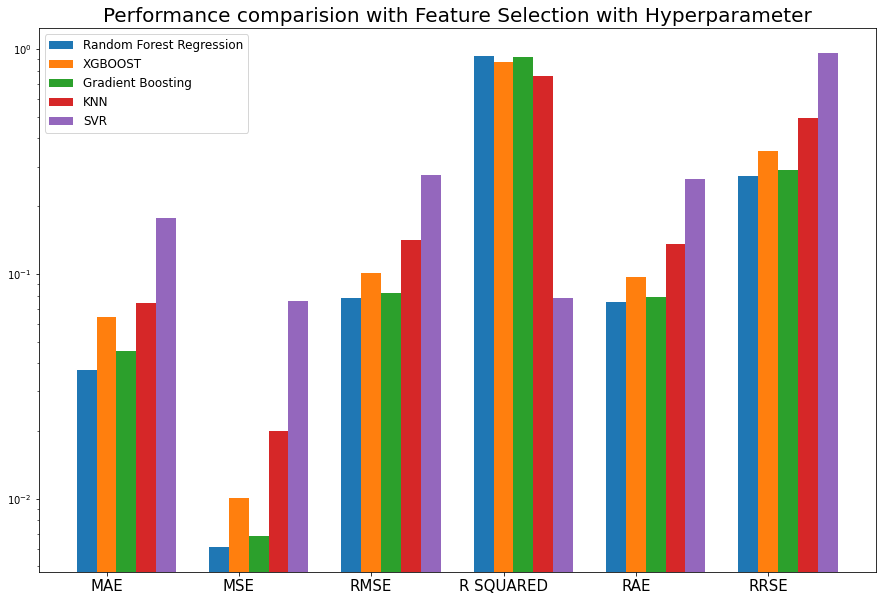

In [45]:
plt.figure(figsize=[15, 10])
X = np.arange(len(rf_index))
plt.bar(X, rf_index, color = 'tab:blue', width = 0.15)
plt.bar(X + 0.15, xgboost_index, color = 'tab:orange', width = 0.15)
plt.bar(X + 0.30, gbr_index, color = 'tab:green', width = 0.15)
plt.bar(X + 0.45, knn_index, color = 'tab:red', width = 0.15)
plt.bar(X + 0.60, svr_index, color = 'tab:purple', width = 0.15)
plt.legend(['Random Forest Regression', 'XGBOOST', 'Gradient Boosting','KNN', 'SVR'], fontsize=12)
plt.xticks([i + 0.15 for i in range(6)], ['MAE', 'MSE', 'RMSE', 'R SQUARED', 'RAE', 'RRSE'], fontsize=15)
plt.title("Performance comparision with Feature Selection with Hyperparameter", fontsize=20)
plt.semilogy()
plt.savefig(IMAGES_PATH+"/perf_comparison4.jpg")

In [46]:
Performance_Metrics=pd.DataFrame({'Performance Metrics':['MAE','MSE','RMSE','R-Squared','RAE','RRSE'],'Random Forest':rf_index,
                          'XGBOOST':xgboost_index,'Gradient Boosting':gbr_index,'KNN':knn_index,'SVR':svr_index})

In [47]:
Performance_Metrics

Performance Metrics  Random Forest   XGBOOST  Gradient Boosting       KNN  \
0                 MAE       0.037249  0.064194           0.045591  0.074224   
1                 MSE       0.006093  0.010100           0.006802  0.019986   
2                RMSE       0.078058  0.100497           0.082474  0.141371   
3           R-Squared       0.925530  0.876561           0.916864  0.755731   
4                 RAE       0.075027  0.096594           0.079272  0.135881   
5                RRSE       0.272892  0.351339           0.288333  0.494235   

        SVR  
0  0.176651  
1  0.075431  
2  0.274646  
3  0.078072  
4  0.263981  
5  0.960171

In this experiment, the Random Forest approach has the best scores for all performance metrics. We notice an improvement in the performance of all the methods except for SVR compared to the first experiment without feature selection and without hyperparameter tuning, proving that the goal of hyperparameter tuning is achieved.


In [48]:
Performance_Metrics.to_csv(RESULTS_PATH+'/Performance_Metrics_4.csv')

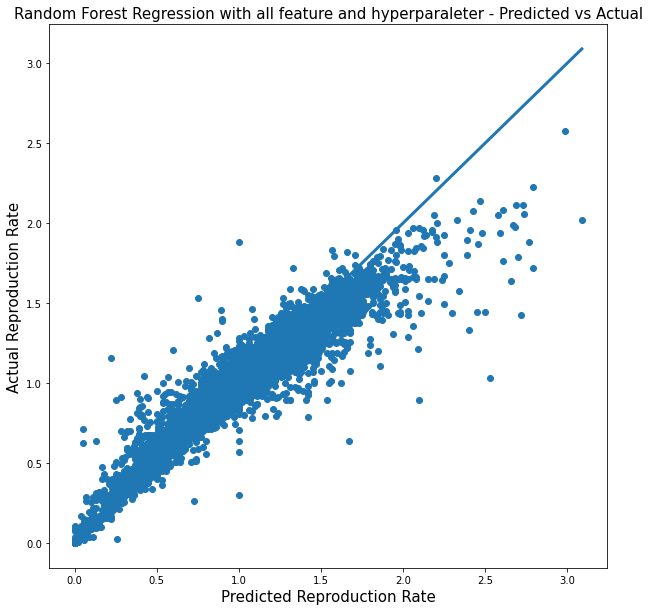

In [49]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, Y_pred_rf, c='tab:blue')
p1 = max(max(Y_pred_rf), max(Y_test))
p2 = min(min(Y_pred_rf), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'tab:blue',linewidth=3, markersize=12)
plt.ylabel('Actual Reproduction Rate', fontsize=15)
plt.xlabel('Predicted Reproduction Rate', fontsize=15)
plt.title('Random Forest Regression with all feature and hyperparaleter - Predicted vs Actual',fontsize=15)
plt.savefig(IMAGES_PATH+"/plot_rf.jpg",bbox_inches ="tight",pad_inches=1.5,facecolor="white")

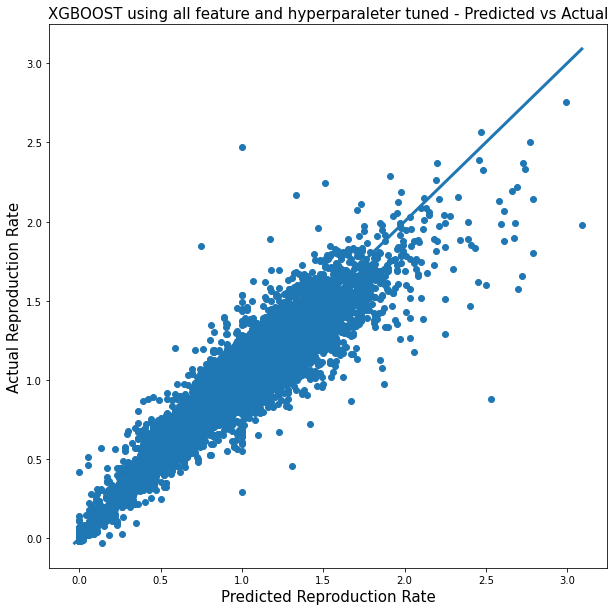

In [50]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, Y_pred_xgboost, c='tab:blue')
p1 = max(max(Y_pred_xgboost), max(Y_test))
p2 = min(min(Y_pred_xgboost), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'tab:blue',linewidth=3, markersize=12)
plt.ylabel('Actual Reproduction Rate', fontsize=15)
plt.xlabel('Predicted Reproduction Rate', fontsize=15)
plt.title('XGBOOST using all feature and hyperparaleter tuned - Predicted vs Actual',fontsize=15)
plt.savefig(IMAGES_PATH+"/plot_xgboost.jpg",bbox_inches ="tight",pad_inches=1.5,facecolor="white")

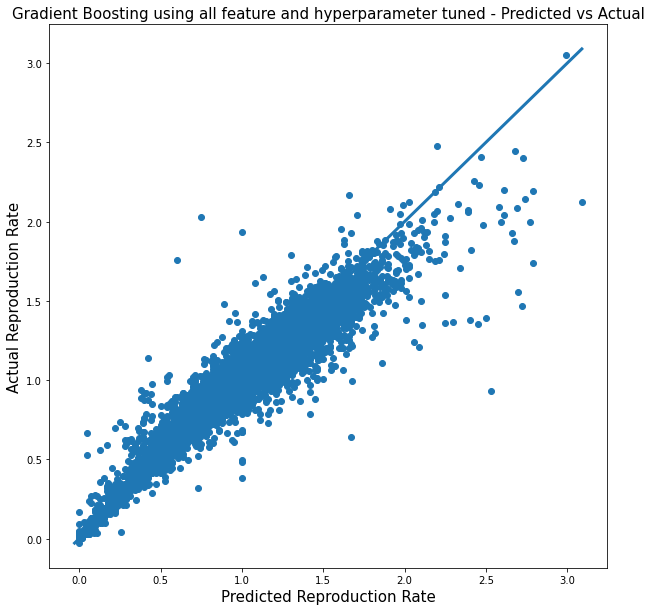

In [51]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, Y_pred_gbr, c='tab:blue')
p1 = max(max(Y_pred_gbr), max(Y_test))
p2 = min(min(Y_pred_gbr), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'tab:blue',linewidth=3, markersize=12)
plt.ylabel('Actual Reproduction Rate', fontsize=15)
plt.xlabel('Predicted Reproduction Rate', fontsize=15)
plt.title('Gradient Boosting using all feature and hyperparameter tuned - Predicted vs Actual',fontsize=15)
plt.savefig(IMAGES_PATH+"/plot_gbr.jpg",bbox_inches ="tight",pad_inches=1.5,facecolor="white")

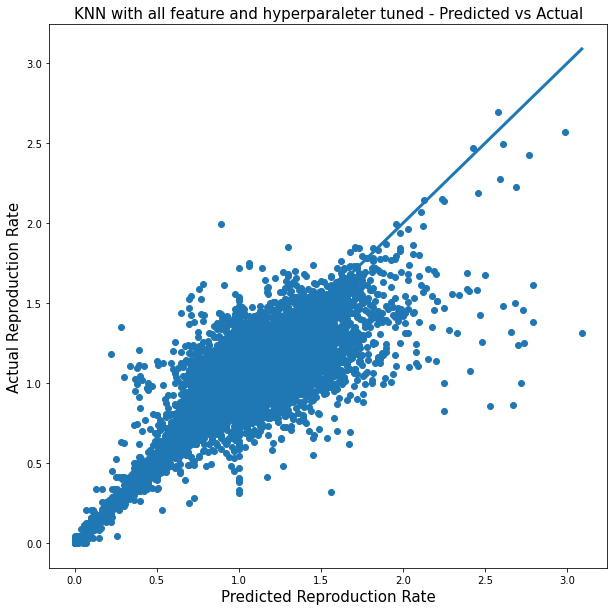

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(Y_test, Y_pred_knn, c='tab:blue')
p1 = max(max(Y_pred_knn), max(Y_test))
p2 = min(min(Y_pred_knn), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'tab:blue',linewidth=3, markersize=12)
plt.ylabel('Actual Reproduction Rate', fontsize=15)
plt.xlabel('Predicted Reproduction Rate', fontsize=15)
plt.title('KNN with all feature and hyperparaleter tuned - Predicted vs Actual',fontsize=15)
plt.savefig(IMAGES_PATH+"/plot_knn.jpg",bbox_inches ="tight",pad_inches=1.5,facecolor="white")

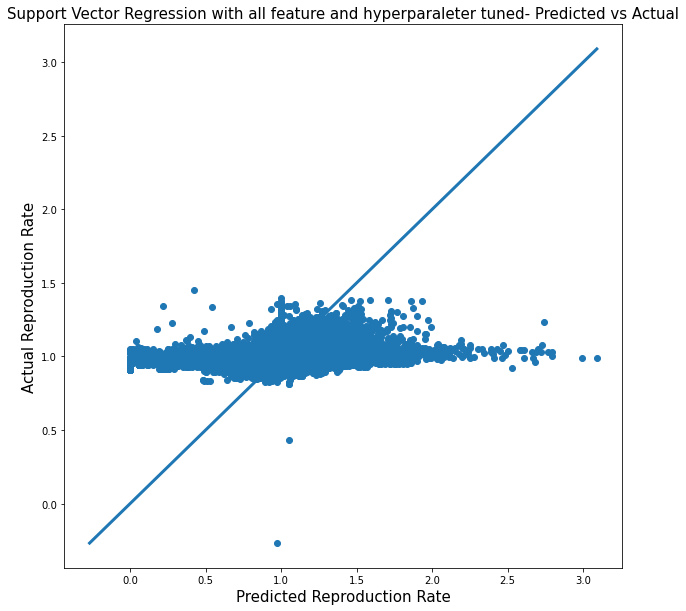

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(Y_test, Y_pred_svr, c='tab:blue')
p1 = max(max(Y_pred_svr), max(Y_test))
p2 = min(min(Y_pred_svr), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'tab:blue',linewidth=3, markersize=12)
plt.ylabel('Actual Reproduction Rate', fontsize=15)
plt.xlabel('Predicted Reproduction Rate', fontsize=15)
plt.title('Support Vector Regression with all feature and hyperparaleter tuned- Predicted vs Actual',fontsize=15)
plt.savefig(IMAGES_PATH+"/plot_svr.jpg",bbox_inches ="tight",pad_inches=1.5,facecolor="white")